<a href="https://colab.research.google.com/github/seonwoo-github/Bunjang.inc-Seller-Recommender-System-Project/blob/main/final_project_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data_path = '/content/drive/MyDrive/Colab Notebooks/data/ad.zip (Unzipped Files)/data/'
ad = pd.read_csv(data_path + 'ad.csv')
advertiser = pd.read_csv(data_path + 'advertiser.csv')
dataset = pd.read_csv(data_path + 'dataset.csv')
impression_log = pd.read_csv(data_path + 'impression_log.csv')
view_log = pd.read_csv(data_path + 'view_log.csv')
viewer = pd.read_csv(data_path + 'viewer.csv')

# AD (data/ad.csv)
- content_id: 광고 상품 아이디
- name: 광고 상품 이름
- keyword: 광고 상품 태그
- price: 광고 상품 가격
- flag_used: 광고 상품 중고 여부
- category_id_1: 광고 상품 1차 카테고리
- category_id_2: 광고 상품 2차 카테고리
- category_id_3: 광고 상품 카테고리
- emergency_cnt: 광고 상품 신고수
- comment_cnt: 광고 상품에 달린 코멘트수
- interest: 광고 상품 클릭수
- pfavcnt: 광고 상품 좋아요 수
- user_id : advertizer id  (추가)

## EDA

In [ ]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1427 entries, 0 to 1426
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content_id     1427 non-null   int64 
 1   user_id        1427 non-null   int64 
 2   name           1427 non-null   object
 3   keyword        1342 non-null   object
 4   price          1427 non-null   int64 
 5   flag_used      1427 non-null   int64 
 6   category_id_1  1427 non-null   int64 
 7   category_id_2  1427 non-null   int64 
 8   category_id_3  1427 non-null   int64 
 9   emergency_cnt  1427 non-null   int64 
 10  comment_cnt    1427 non-null   int64 
 11  interest       1427 non-null   int64 
 12  pfavcnt        1427 non-null   int64 
dtypes: int64(11), object(2)
memory usage: 145.1+ KB


In [ ]:
ad.describe()

,content_id,user_id,price,flag_used,category_id_1,category_id_2,category_id_3,emergency_cnt,comment_cnt,interest,pfavcnt
count,1.427000e+03,1.427000e+03,1.427000e+03,1427.000000,1427.000000,1427.000000,1.427000e+03,1427.000000,1427.000000,1.427000e+03,1427.000000
mean,1.507383e+08,1.264119e+07,4.858902e+05,1.507358,577.733006,571764.733006,5.486859e+08,1.100911,3.704975,9.879053e+03,167.454800
std,2.265078e+07,2.057324e+07,9.559031e+05,1.280086,143.875119,151494.937899,1.835431e+08,10.804247,38.945396,1.067729e+05,1331.045728
min,2.282554e+07,1.317000e+04,1.000000e+04,1.000000,220.000000,310.000000,3.100000e+02,0.000000,0.000000,6.000000e+00,0.000000
25%,1.517148e+08,2.378665e+06,8.000000e+04,1.000000,600.000000,600100.000000,4.302007e+08,0.000000,0.000000,1.485000e+02,4.000000
50%,1.613935e+08,6.965817e+06,2.550000e+05,1.000000,600.000000,600700.000000,6.007000e+08,0.000000,0.000000,4.940000e+02,12.000000
75%,1.627922e+08,1.089563e+07,5.750000e+05,2.000000,600.000000,600700.000000,6.007000e+08,0.000000,0.000000,2.677500e+03,52.000000
max,1.632739e+08,7.730665e+07,1.000000e+07,13.000000,999.000000,990200.000000,9.202002e+08,273.000000,1209.000000,3.511826e+06,36484.000000


In [ ]:
print(ad.shape)
ad.head()

(1427, 13)


,content_id,user_id,name,keyword,price,flag_used,category_id_1,category_id_2,category_id_3,emergency_cnt,comment_cnt,interest,pfavcnt
0,157826057,114088,인텔 4세대 i5-4670 사무용 컴퓨터 팝니다.,"사무용컴퓨터,사무용PC,중고사무용컴퓨터,중고사무용PC,사무용중고컴퓨터",250000,1,600,600100,600100006,0,0,714,4
1,162431268,3247363,갤럭시노트10+ 512GB 글로우 (무잔상) ! 0821,"갤럭시노트10,노트10플러스,노트10플러스중고,노트10플러스공기,노트10플러스글로",439000,1,600,600700,600700001,0,0,39,2
2,162806215,12851816,#한정판매#갤럭시S21 256GB 화이트 SS급 중고폰공기계[75333],"갤럭시S21,갤럭시S21화이트,S21화이트",620000,1,600,600700,600700001,0,0,145,5
3,152625380,2347538,#당일발송#갤럭시S9플러스 64G 대량판매 등급별초특가!,"S9플러스,S9플러스중고,갤럭시S9플러스",195000,1,600,600700,600700001,0,0,234,8
4,161572473,12927760,포터2카고 중고화물차 팝니다.,"포터2,포터중고차,포터2카고,포터2중고,포터2카고중고",9800000,1,750,750200,750200700,0,0,388,4


In [ ]:
ad.isnull().sum()

content_id        0
user_id           0
name              0
keyword          85
price             0
flag_used         0
category_id_1     0
category_id_2     0
category_id_3     0
emergency_cnt     0
comment_cnt       0
interest          0
pfavcnt           0
dtype: int64

In [ ]:
keword_isnull = ad[ad['keyword'].isnull() == True]
keword_isnull.category_id_1.value_counts()

600    66
750    11
410     2
999     1
990     1
700     1
810     1
400     1
910     1
Name: category_id_1, dtype: int64

In [ ]:
print(f'ad shape : {ad.shape}')
print('\n')
for feat in ad:
    print({feat : ad[feat].nunique()})

# name 개수가 1427이 아닌 이유 => nunique()이기 때문에 같은 제목으로 올린 중복 글은 카운트x

ad shape : (1427, 13)


{'content_id': 1427}
{'user_id': 308}
{'name': 1396}
{'keyword': 1204}
{'price': 405}
{'flag_used': 3}
{'category_id_1': 21}
{'category_id_2': 95}
{'category_id_3': 187}
{'emergency_cnt': 23}
{'comment_cnt': 52}
{'interest': 1021}
{'pfavcnt': 307}


In [ ]:
# user_id
ad.user_id.value_counts().head(20)

12851816    146
10255755    104
10197556     92
3947717      73
2347538      52
87148        51
1266155      50
6972746      46
3682152      45
1462217      28
6965817      27
2723062      23
9592612      22
948674       20
9698825      17
4183835      15
1358510      13
1909021      12
178506       12
4776936      11
Name: user_id, dtype: int64

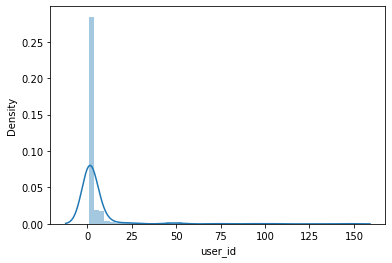

In [ ]:
sns.distplot(ad.user_id.value_counts())

In [ ]:
ad[ad['user_id'] == 12851816]

,content_id,user_id,name,keyword,price,flag_used,category_id_1,category_id_2,category_id_3,emergency_cnt,comment_cnt,interest,pfavcnt
2,162806215,12851816,#한정판매#갤럭시S21 256GB 화이트 SS급 중고폰공기계[75333],"갤럭시S21,갤럭시S21화이트,S21화이트",620000,1,600,600700,600700001,0,0,145,5
7,137118036,12851816,#특별가격이벤트#갤럭시S10플러스 128G 대량판매 등급별초특가!,"s10플러스공기계,갤럭시s10플러스,s10플러스,s10플러스중고",295000,1,600,600700,600700001,0,1,4802,87
14,161384763,12851816,#한정판매# 갤럭시S10 A급 화이트 128G 중고폰공기계[99996],"갤럭시S10,S10중고,S10중고폰,S10공기계,직거래",275000,1,600,600700,600700001,0,0,520,10
21,137078818,12851816,#당일발송#아이폰SE2 64G/128G 대량판매 등급별초특가!,"아이폰SE2중고,아이폰se2공기계,SE2중고,SE2,아이폰SE2",250000,1,600,600700,600700001,1,4,25583,817
22,149152299,12851816,#대량판매#갤럭시S21플러스 256G 대량판매 등급별초특가,"S21플러스,S21플러스중고,S21플러스중고폰,갤럭시S21플러스",649000,1,600,600700,600700001,0,1,7358,165
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1373,137118198,12851816,#당일발송#갤럭시S20 128G 대량판매 등급별초특가!,"중고갤럭시s20,s20중고폰,s20공기계,갤럭시s20,s20",419000,1,600,600700,600700001,0,4,15581,387
1388,162629569,12851816,#한정판매#아이폰11 A급 화이트 64G 중고폰공기계 [86349],"아이폰11,아이폰11중고,아이폰11중고폰,아이폰11공기계,직거래",555000,1,600,600700,600700001,0,0,207,3
1397,138443500,12851816,#당일발송#S10 5G 256G 대량판매 등급별 초특가!!,"갤럭시s10중고,s105g중고폰,s105g공기계,갤럭시s105g",255000,1,600,600700,600700001,0,0,5252,94
1412,155571548,12851816,중고폰매입 노트10플러스 노트20 노트20울트라 s8 s9 s10,"저가폰매입,파손폰매입,아이폰매입,갤럭시매입",1000000,1,600,600700,600700001,0,0,391,7


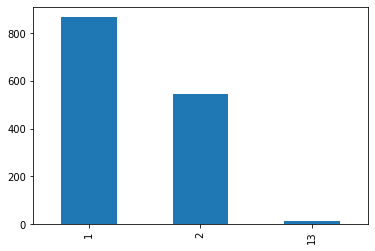

In [ ]:
# flag_used
ad.flag_used.value_counts().plot.bar()  # 13??????

In [ ]:
flag_used13 = ad[ad['flag_used'] == 13][['flag_used', 'name', 'user_id', 'emergency_cnt']]
print(f'flag_used 13 유저 \n{flag_used13.user_id.value_counts()}')
flag_used13

flag_used 13 유저 
87148       4
12851816    3
9592612     2
8105166     1
3636411     1
11264364    1
8094755     1
3876881     1
3745504     1
Name: user_id, dtype: int64


,flag_used,name,user_id,emergency_cnt
217,13,럭키슈에뜨 허리선이쁜 니트 F n2717 애슐리상점,87148,0
498,13,"(미필,저신용OK)만19세부터 중고차 전액할부가능!!",11264364,2
518,13,#당일발송#노트8 64G 대량판매 등급별초특가!,12851816,2
723,13,#당일발송# 갤럭시 A90 5G 전등급 전용량 등급별초특가!!,12851816,0
736,13,대구 개인용달 소형이사 원룸이사 저렴히 이용해보세요,3636411,0
827,13,오즈세컨 배기 청바지 n5165 애슐리상점,87148,0
828,13,럭키슈에뜨 밑단포인트 바지 36 n5163 애슐리상점,87148,0
915,13,24시간)문상91%모바일교환권94%백화점98%,3745504,22
934,13,중국도자기 골동품,8094755,0
1131,13,#당일발송#노트9 128G 대량판매 등급별초특가!,12851816,1


어플에서 거래 게시글을 올릴 때 중고/새상품 여부를 필히 체크해야함.
=> 고로 13은 미선택이 아님
- 가능성 1 : 중고 유무를 판단할 수 없는 것 (ex 용달, 중고차 할부 등)
- 가능성 2 : 가품/사기 의심 게시물

In [ ]:
ad.emergency_cnt.values

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# emergency_count
ad[ad['emergency_cnt'] > 100]

,content_id,user_id,name,keyword,price,flag_used,category_id_1,category_id_2,category_id_3,emergency_cnt,comment_cnt,interest,pfavcnt
1075,31537985,2617066,미백/여드름 마스크 트러블 불만족 환불! 후기 1400개,"폼클렌징,여드름,천연비누,여드름비누,모공축소",11000,2,410,410100,410100400,272,649,3511826,36484
1180,75221723,96166,-16kg 감량후기 다이어트 선슬 차전자피!,"다이어트,차전자피,다이어트약,다이어트식품",19900,2,410,410900,410900,273,1209,1646378,31058


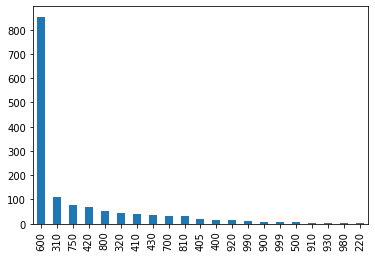

In [ ]:
# category
ad.category_id_1.value_counts().plot.bar()

In [ ]:
ad[ad['category_id_1'] == 600]  # 600 = 전자 제품

,content_id,user_id,name,keyword,price,flag_used,category_id_1,category_id_2,category_id_3,emergency_cnt,comment_cnt,interest,pfavcnt
0,157826057,114088,인텔 4세대 i5-4670 사무용 컴퓨터 팝니다.,"사무용컴퓨터,사무용PC,중고사무용컴퓨터,중고사무용PC,사무용중고컴퓨터",250000,1,600,600100,600100006,0,0,714,4
1,162431268,3247363,갤럭시노트10+ 512GB 글로우 (무잔상) ! 0821,"갤럭시노트10,노트10플러스,노트10플러스중고,노트10플러스공기,노트10플러스글로",439000,1,600,600700,600700001,0,0,39,2
2,162806215,12851816,#한정판매#갤럭시S21 256GB 화이트 SS급 중고폰공기계[75333],"갤럭시S21,갤럭시S21화이트,S21화이트",620000,1,600,600700,600700001,0,0,145,5
3,152625380,2347538,#당일발송#갤럭시S9플러스 64G 대량판매 등급별초특가!,"S9플러스,S9플러스중고,갤럭시S9플러스",195000,1,600,600700,600700001,0,0,234,8
5,159624182,12563307,[화인]최저가!!! SSD중고컴퓨터 배틀그라운드 오버워치 게이밍PC !!,"SSD컴퓨터,게이밍PC본체,사무용컴퓨터중고,최저가PC,조립PC데스크탑",180000,1,600,600100,600100006,0,0,2394,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422,130344977,948674,*당일발송*아이폰6s 최저가 판매,NaN,109000,2,600,600700,600700001,0,0,15612,290
1423,156423859,10255755,노트10플러스 [블랙] 45301 (S급),"노트10+,갤럭시노트10+,노트10플러스,갤럭시노트10플러스,노트10plus",450000,1,600,600700,600700001,0,0,1207,18
1424,163149174,10197556,노트20 256기가 블랙 A급 48516,"노트20,갤럭시노트20,note20",510000,1,600,600700,600700001,0,0,99,3
1425,160955756,10197556,노트20 256기가 브론즈 A급 48011,"노트20,갤럭시노트20,note20",510000,1,600,600700,600700001,0,0,617,12


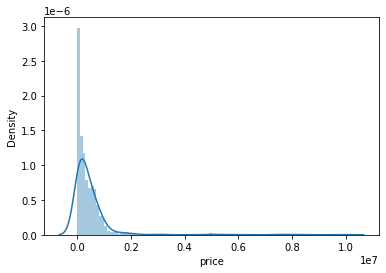

In [ ]:
# price
sns.distplot(ad['price'], bins = 100)  # 0.1 => 1,000,000만원

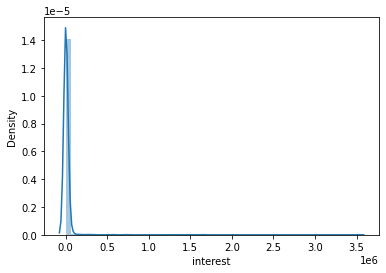

In [ ]:
# interest
sns.distplot(ad['interest'])

# Advertiser (data/advertiser.csv)
- user_id: 광고주 아이디
- favorite_count: 광고주 선호수
- grade: 광고주 등급
- item_count: 광고주가 가지고 있는 상품수
- interest: 광고주가 받은 클릭수
- review_count: 광고주가 받은 리뷰수
- comment_count: 광고주가 작성한 코멘트수
- follower_count: 광고주의 팔로워수
- pay_count: 광고주의 결제시스템 거래수
- parcel_post_count: 광고주의 택배거래수
- transfer_count: 광고주의 거래수
- chat_count: 광고주의 채팅수

## EDA

In [ ]:
print(advertiser.shape)
advertiser.head()

(1539, 12)


,user_id,favorite_count,grade,item_count,interest,review_count,comment_count,follower_count,pay_count,parcel_post_count,transfer_count,chat_count
0,2487730,1899,7673,431,31681,775,529,0,575,0,35,130
1,1462217,799,5520,433,16794,570,250,0,942,0,57,11
2,6972746,3692,7526,2530,36944,776,828,0,325,0,10,13
3,1358510,1228,2106,100,27142,223,431,0,232,9,1,4
4,1358510,1228,2106,100,27142,223,431,0,232,9,1,4


# Impression Logs (data/impression_log.csv)
- imp_id: 노출 아이디
- content_id: 광고 상품 아이디
- server_time_kst: 로그(노출)생성 시간
- bid_price: 광고 상품 입찰가 (PPC)
- user_id: 노출 대상 사용자 아이디 (해쉬)
- device_type: 노출 대상 디바이스 타입

In [ ]:
print(impression_log.shape)
impression_log.head()

(852587, 6)


,imp_id,content_id,server_time_kst,bid_price,user_id,device_type
0,97cf612d3a7008353958,161592430,2021-08-31T05:07:20.945+09:00,50,11555138,a
1,99d1612d39112085014f,162892746,2021-08-31T05:02:38.277+09:00,50,1310312,a
2,97ca612d461111487741,162806628,2021-08-31T05:57:03.384+09:00,55,76429349,a
3,97f9612d3995149e6b11,161593862,2021-08-31T05:03:49.145+09:00,270,74800572,a
4,97f9612d3a22149eef25,161587624,2021-08-31T05:06:26.494+09:00,50,4454345,a


In [ ]:
print(impression_log.user_id.nunique())
print(impression_log.imp_id.nunique())

56381
851023


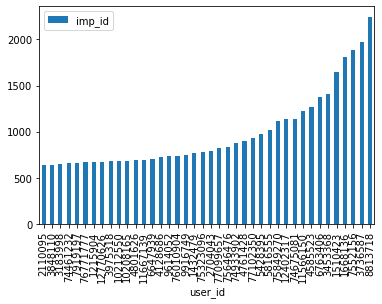

In [ ]:
# 광고주 한명 당 최대 광고 노출 수

pd.DataFrame(impression_log.groupby('user_id')['imp_id'].count()).sort_values(by = ['imp_id']).tail(40).plot.bar()

In [ ]:
pd.DataFrame(impression_log.groupby('imp_id')['user_id'].count()).sort_values(by = ['user_id'])

,user_id
imp_id,
971a612c3f2609363baa,1
9919612dd49b220ea8a9,1
9919612dd49b220ea8aa,1
9919612dd4a1220ebc91,1
9919612dd4a1220ebc92,1
...,...
9919612e11a023090e03,4
97cf612e11a10ac65b82,4
99d1612dcf5b2207a386,4


In [ ]:
impression_log.imp_id.value_counts()

99d1612dcf5b2207a386    4
9919612cf5dc1fc54c9f    4
99d1612dcf5b2207a381    4
99d1612cf5bd1fd299ab    4
97f9612df2f516aee7b2    4
                       ..
9919612d952f2134baa3    1
971a612e1e460fc01565    1
97f9612e059316f92905    1
97cf612db28809532424    1
99d1612de0a2224d2901    1
Name: imp_id, Length: 851023, dtype: int64

In [ ]:
impression_log[impression_log['imp_id'] == '9919612e11a023090e02']

,imp_id,content_id,server_time_kst,bid_price,user_id,device_type
260949,9919612e11a023090e02,161384072,2021-08-31T20:25:37.411+09:00,50,8000422,a
358166,9919612e11a023090e02,161384072,2021-08-31T20:25:34.395+09:00,50,8000422,a
362980,9919612e11a023090e02,161384072,2021-08-31T20:25:28.237+09:00,50,8000422,a
444786,9919612e11a023090e02,161384072,2021-08-31T20:25:38.939+09:00,50,8000422,a


- 동일 유저가 같은 광고를 반복 클릭하는 경우도 있음

In [ ]:
impression_log.device_type.value_counts()

a    852587
Name: device_type, dtype: int64

<초미세먼지 인사이트>
- device 종류를 나타내는 feature가 있는데 값이 1개다 => 웹, 모바일 앱 log가 각각 따로 관리 되고 있다.
- 본 데이터는 모바일 앱의 log다.
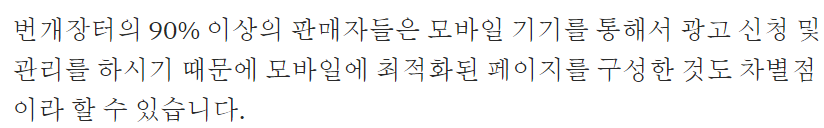  
=> 출처 : 번개장터 기술 블로그

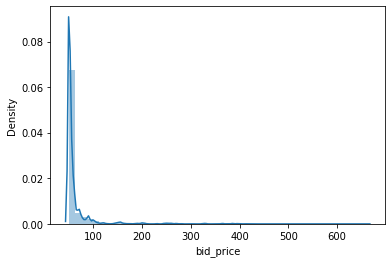

In [ ]:
sns.distplot(impression_log['bid_price'])

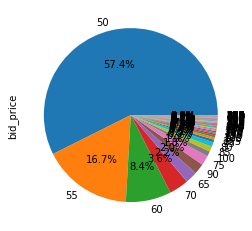

In [ ]:
impression_log['bid_price'].value_counts().plot.pie(autopct = '%1.1f%%')

# View (Click) Logs (data/view_log.csv)
- imp_id: 노출 아이디
- server_time_kst: 로그(뷰) 생성 시간
- bid_price: 클릭된 광고 상품 입찰가 (PPC)
- device_type: 클릭 대상 디바이스 타입

## EDA

In [ ]:
print(f'impression_log shape : {impression_log.shape}')
print(f'view_log shape : {view_log.shape}')
view_log.head()

impression_log shape : (852587, 6)
view_log shape : (27006, 4)


,imp_id,server_time_kst,bid_price,device_type
0,99d1612dded122458e99,2021-08-31T16:56:46.013+09:00,50,a
1,998c612ddab9008cceee,2021-08-31T16:32:01.533+09:00,385,a
2,998c612dd77f007f2d67,2021-08-31T16:17:26.423+09:00,50,a
3,971a612ddff00eb50a47,2021-08-31T16:53:48.436+09:00,70,a
4,971a612ddd140ea93f30,2021-08-31T16:41:29.857+09:00,155,a


In [ ]:
view_log.imp_id.nunique()

25303

- impression_log에 비해 view_log의 size가 압도적으로 작음  
  => 단순 노출 >>>>> 클릭이기 때문
- 왜 view_id가 아니라 imp_id인가?

In [ ]:
# view_log와 impression_log 비교
print(impression_log[impression_log['imp_id'] == '99d1612dded122458e99'][['server_time_kst', 'bid_price']])
print(impression_log[impression_log['imp_id'] == '998c612ddab9008cceee'][['server_time_kst', 'bid_price']])
print(impression_log[impression_log['imp_id'] == '998c612dd77f007f2d67'][['server_time_kst', 'bid_price']])
print(impression_log[impression_log['imp_id'] == '971a612ddff00eb50a47'][['server_time_kst', 'bid_price']])
print(impression_log[impression_log['imp_id'] == '971a612ddd140ea93f30'][['server_time_kst', 'bid_price']]) 

                      server_time_kst  bid_price
617508  2021-08-31T16:48:41.780+09:00         50
                      server_time_kst  bid_price
601250  2021-08-31T16:31:14.431+09:00        385
                      server_time_kst  bid_price
660038  2021-08-31T16:17:21.879+09:00         50
                      server_time_kst  bid_price
595086  2021-08-31T16:53:43.847+09:00         70
                      server_time_kst  bid_price
602199  2021-08-31T16:41:10.127+09:00        155


<초미세먼지 인사이트>

- view_log에 존재하는 imp_id가 impreesion_log에도 존재함.
- 서로 bid_price도 동일
- server_time_kst를 보면 항상 impression_log가 view_log보다 빠름

- view_log의 imp_id ∈ impression_log의 imp_id
- impression과 view의 광고는 서로 같다.
- 일단 광고가 노출이 되면 impression_log에 기록된다.  
  => 그 뒤 해당 광고가 클릭으로 이어지면 별도로 view_log에 기록된다. (view_log size가 impression_log보다 작은 이유)
- click으로 이어진다고 광고비를 더 받지는 않는다. (bid_price 동일)

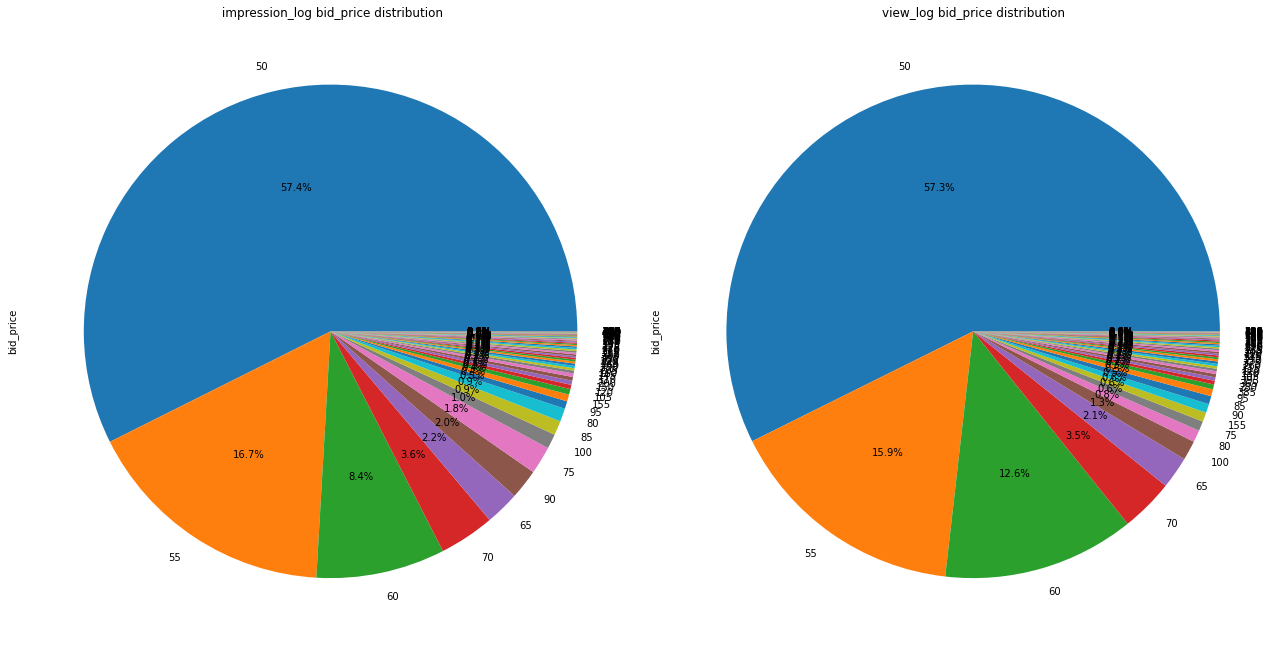

In [ ]:
# impression&view bid_price distribution 비교


f, ax = plt.subplots(1, 2, figsize = (18,10))

# impression_log bid_price distribution
impression_log['bid_price'].value_counts().plot.pie(autopct = '%1.1f%%', ax = ax[0])
ax[0].set_title(' impression_log bid_price distribution')
ax[0].set_ylabel('bid_price')

# view_log bid_price distribution
view_log['bid_price'].value_counts().plot.pie(autopct = '%1.1f%%', ax = ax[1])
ax[1].set_title('view_log bid_price distribution')
ax[1].set_ylabel('bid_price')

plt.tight_layout()
plt.show()

- bid_price distribution은 impression과 view 서로 (거의) 동일
- 경매 입찰 시작가도 50으로 동일

# User (data/viewer.csv)
- user_id: 클릭한 사용자 아이디 (해쉬)
- gender: 클릭한 사용자 성별
- grade: 클릭한 사용자 나이
- following_cnt: 상품 노출 대상의 팔로잉 수
- pay_count: 상품 노출 대상의 거래수
- parcel_post_count: 상품 노출 대상의 택배 거래수
- transfer_count: 상품 노출 대상의 송금 거래수  

In [ ]:
print(viewer.shape)
viewer.head()

(56381, 8)


,user_id,gender,age,following_cnt,pay_count,parcel_post_count,transfer_count,chat_count
0,513808,2,48,0,0,0,0,0
1,10764680,1,25,0,0,0,0,0
2,516424,0,0,1,0,0,0,0
3,10248440,1,36,14,0,0,0,0
4,9741736,1,30,2,0,0,0,0


- 팔로잉 수, 거래 수, 택배 거래 수, 송금 거래 수가 높은 유저에게 '관심 있을만 한' 광고를 '우선적으로' 보여준다면 광고 효율이 더 높지 않을까
- 광고를 본 유저가 어떤 광고를 봤는지에 대한 정보가 없음
  
- 데이별로 user_id가 지칭하는 바가 다름
  - AD, Advertiser의 user_id : 광고주
  - impression_logs, user의 user_id : 광고를 본 사람  

In [ ]:
viewer.user_id.nunique()

56381

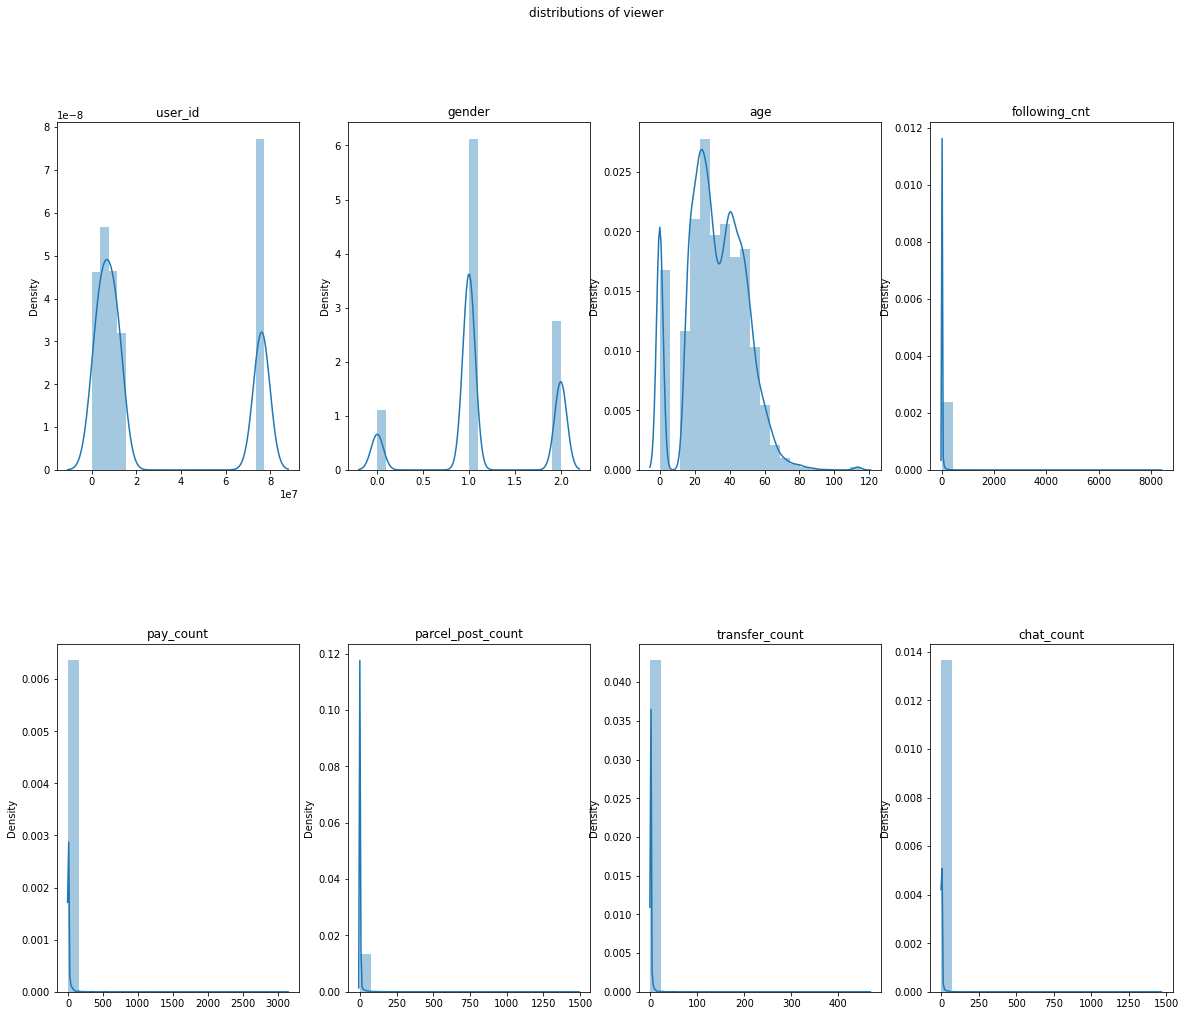

In [ ]:
# viewer information distribution
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 16))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('distributions of viewer')

for ax, feature, name in zip(axes.flatten(), viewer.T.values.tolist(), list(viewer.columns)):
    sns.distplot(feature, ax=ax, bins=20)
    ax.set(title=name)

- user_id  
  - 중간에 분포가 비어있는 부분이 의미하는 것은?

- 대부분 분포가 한쪽으로 편향되어 있음.

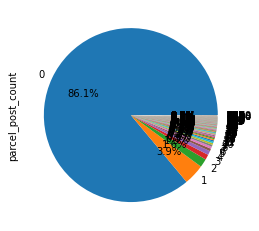

In [ ]:
viewer['parcel_post_count'].value_counts().plot.pie(autopct = '%1.1f%%')

In [ ]:
viewer[viewer['pay_count'] > 100]['user_id']

2679     12395706
4772       834713
5191      2293309
6510      2160519
7458      3914238
           ...   
55927     4534322
55996    12494584
56208       11632
56314     4853510
56325     6286921
Name: user_id, Length: 80, dtype: int64

# Dataset

In [ ]:
print(dataset.shape)
dataset.head()

(853868, 35)


,label,day,hour,c_user_gender,c_user_age,user_following_count,user_pay_count,user_parcel_post_count,user_transfer_count,user_chat_count,advertiser_grade,advertiser_item_count,advertiser_interest_count,advertiser_follower_count,advertiser_pay_count,advertiser_review_count,advertiser_parcel_post_count,advertiser_transfer_count,advertiser_chat_count,advertiser_favorite_count,advertiser_comment_count,content_bid_price,content_price,c_content_flag_used,c_content_category_id_1,c_content_category_id_2,c_content_category_id_3,content_emergency_count,content_comment_count,content_interest_count,content_favorite_count,content_id,server_time_kst,m_time,content_img_url
0,0,20210831,5,0,0,28,0,0,0,0,5285,246,4521,0,496,542,0,0,11,2131,738,70,310000.0,1.0,600.0,600700.0,600700001.0,1.0,6.0,28595.0,1067.0,137083455,2021-08-31T05:59:24.222+09:00,1629687449,https://media.bunjang.co.kr/product/137083455_...
1,0,20210831,5,1,46,0,0,0,0,0,0,3940,84,0,0,0,0,0,0,34,0,50,200000.0,1.0,750.0,750610.0,750610100.0,0.0,0.0,179.0,7.0,162622860,2021-08-31T05:05:20.388+09:00,1629786400,https://media.bunjang.co.kr/product/162622860_...
2,0,20210831,5,1,26,9,0,0,0,0,0,3940,84,0,0,0,0,0,0,34,0,50,200000.0,1.0,750.0,750610.0,750610100.0,0.0,0.0,179.0,7.0,162622860,2021-08-31T05:29:27.712+09:00,1629786400,https://media.bunjang.co.kr/product/162622860_...
3,0,20210831,5,2,45,3,0,0,0,0,323,557,185,0,20,33,0,0,0,177,1,55,32000.0,2.0,810.0,810200.0,810200300.0,0.0,0.0,1653.0,122.0,149111357,2021-08-31T05:30:35.883+09:00,1630373220,https://media.bunjang.co.kr/product/149111357_...
4,0,20210831,5,1,34,1,0,0,0,0,7673,431,31681,0,575,775,0,35,130,1900,529,80,699000.0,1.0,600.0,600100.0,600100006.0,8.0,2.0,40601.0,689.0,100010275,2021-08-31T05:15:15.906+09:00,1630518932,https://media.bunjang.co.kr/product/100010275_...


- 광고를 본 사람(viewer) 정보 -> 광고주(advertiser) 정보 -> 광고된 제품(content) 정보 순서로 컬럼이 진행되고 있음
- label을 제외하면 이미 다른 data에 존재하는 값으로 구성  
  => dataset은 ad, advertiser, imp/view log에서 취합하여 만든 data  
  => dataset을 토대로 필요한 column이 있으면 추가해서 사용

<고민해볼만한 점>
1. user와 content 앞에 붙은 c의 의미
2. dataset과 impression_log의 row는 같아야하지 않을까?  
  => impresssion 이후 클릭했으면 label 1 아니면 0으로 기록되었을 것.

In [ ]:
dataset.columns

Index(['label', 'day', 'hour', 'c_user_gender', 'c_user_age',
       'user_following_count', 'user_pay_count', 'user_parcel_post_count',
       'user_transfer_count', 'user_chat_count', 'advertiser_grade',
       'advertiser_item_count', 'advertiser_interest_count',
       'advertiser_follower_count', 'advertiser_pay_count',
       'advertiser_review_count', 'advertiser_parcel_post_count',
       'advertiser_transfer_count', 'advertiser_chat_count',
       'advertiser_favorite_count', 'advertiser_comment_count',
       'content_bid_price', 'content_price', 'c_content_flag_used',
       'c_content_category_id_1', 'c_content_category_id_2',
       'c_content_category_id_3', 'content_emergency_count',
       'content_comment_count', 'content_interest_count',
       'content_favorite_count', 'content_id', 'server_time_kst', 'm_time',
       'content_img_url'],
      dtype='object')

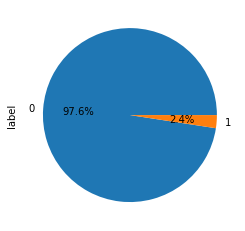

In [ ]:
dataset['label'].value_counts().plot.pie(autopct = '%1.1f%%')

- class imbalance가 심함.  
  => 평가 지표로 accuracy, recall 사용이 힘듬.  
  => 대신 AUC, log_loss 사용

- class의 비중을 맞춰주어야할까?  
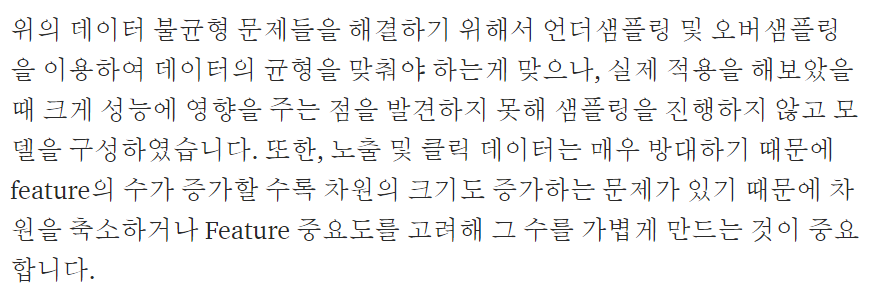  
=> 출처 : 번개장터 기술블로그